In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('./50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [3]:
# df = df.drop(df.where(df["Marketing Spend"] == 0.00, axis=1))
df = df[df["Marketing Spend"] != 0]
X = np.array(df.iloc[:,:-1])
Y = np.array(df.iloc[:,-1])
X.shape

(47, 3)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
# y_train = y_train.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)

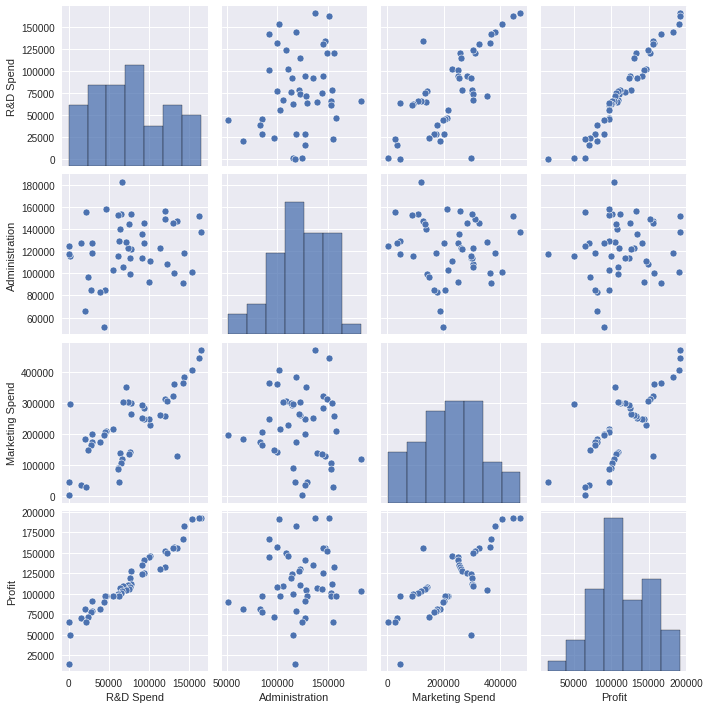

In [5]:
sns.pairplot(df)

In [6]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor()

In [7]:
y_pred = model.predict(X_test)

In [8]:
model.score(X_test, y_test)

0.9011049007312759

In [9]:
from sklearn.metrics import r2_score, mean_squared_error
s_AdaBoostRegressor = r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)

In [10]:
newdf1 = pd.DataFrame(X_train)
newdf1[3] = y_train
newdf1.columns = df.columns

In [11]:
newdf2 = pd.DataFrame(X_test)
newdf2[3] = y_test
newdf2.columns = df.columns
newdf2['Predicted Profit'] = y_pred
newdf2.head()

,R&D Spend,Administration,Marketing Spend,Profit,Predicted Profit
0,73994.56,122782.75,303319.26,110352.25,108723.686667
1,46014.02,85047.44,205517.64,96479.51,94489.335556
2,20229.59,65947.93,185265.10,81229.06,70629.280000
3,63408.86,129219.61,46085.25,97427.84,103036.378571
4,123334.88,108679.17,304981.62,149759.96,137417.576250


In [12]:
newdf = pd.concat([newdf1, newdf2])
newdf.tail()

,R&D Spend,Administration,Marketing Spend,Profit,Predicted Profit
5,1000.23,124153.04,1903.93,64926.08,49490.750000
6,120542.52,148718.95,311613.29,152211.77,132717.697143
7,142107.34,91391.77,366168.42,166187.94,156991.120000
8,91992.39,135495.07,252664.93,134307.35,131878.524000
9,38558.51,82982.09,174999.30,81005.76,89949.140000


In [13]:
def plotter(model_name):
    plt.title(f"Model = {model_name}")
    plt.scatter(newdf["R&D Spend"], newdf["Profit"], label = 'True Profit')
    plt.scatter(newdf["R&D Spend"], newdf["Predicted Profit"], label = 'Predicted Profit')
    plt.xlabel('R&D Spend')
    plt.ylabel("Profit")
    plt.show()
    plt.scatter(newdf["Marketing Spend"], newdf["Profit"], label = 'True Profit')
    plt.scatter(newdf["Marketing Spend"], newdf["Predicted Profit"], label = 'Predicted Profit')
    plt.xlabel('Marketing Spend')
    plt.ylabel("Profit")
    plt.show()
    plt.scatter(newdf["Administration"], newdf["Profit"], label = 'True Profit')
    plt.scatter(newdf["Administration"], newdf["Predicted Profit"], label = 'Predicted Profit')
    plt.xlabel('MArketing Spend')
    plt.ylabel("Profit")
    plt.show()

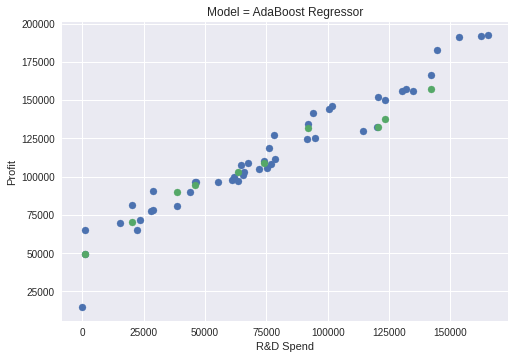

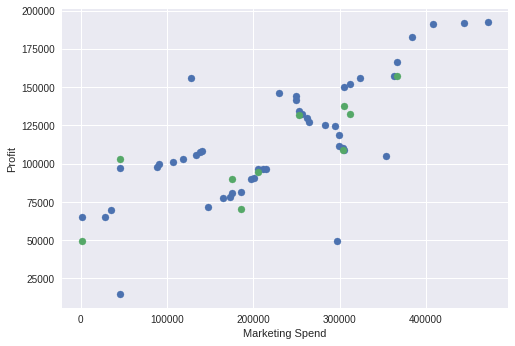

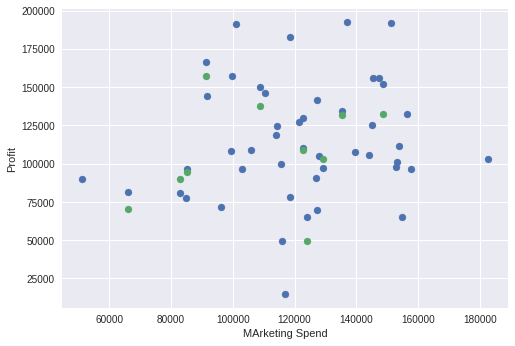

In [14]:
plotter("AdaBoost Regressor")

In [15]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor()
model1.fit(X_train, y_train)

DecisionTreeRegressor()

In [16]:
y_pred1 = model1.predict(X_test)

In [17]:
from sklearn.metrics import r2_score
s_DecisionTreeRegressor = r2_score(y_test, y_pred1), mean_squared_error(y_test, y_pred1)
s_DecisionTreeRegressor

(0.8528732717154179, 162381733.07964993)

In [18]:
newdf2["Predicted Profit"] = y_pred1
newdf = pd.concat([newdf1, newdf2])

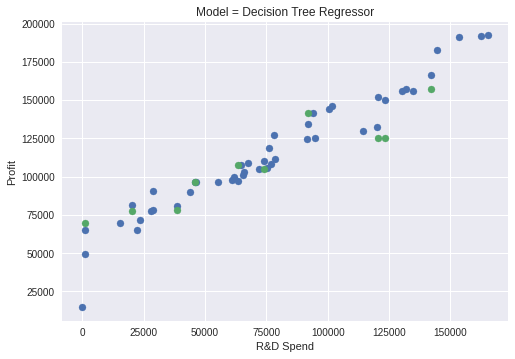

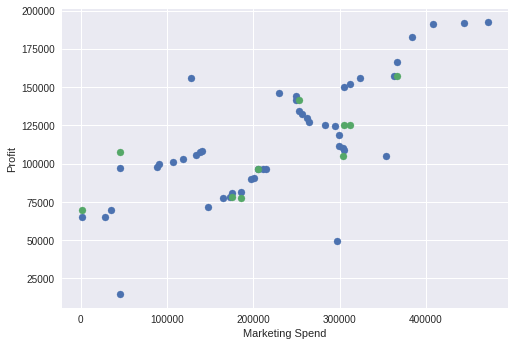

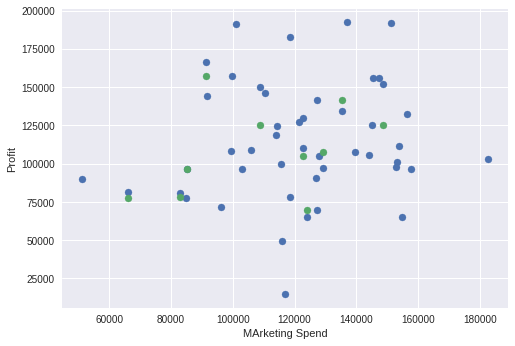

In [19]:
plotter("Decision Tree Regressor")

In [20]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()
model2.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
y_pred2 = model.predict(X_test)
s_RandomForest = r2_score(y_test, y_pred2), mean_squared_error(y_test, y_pred2)

In [22]:
newdf2["Predicted Profit"] = y_pred2
newdf = pd.concat([newdf1, newdf2])

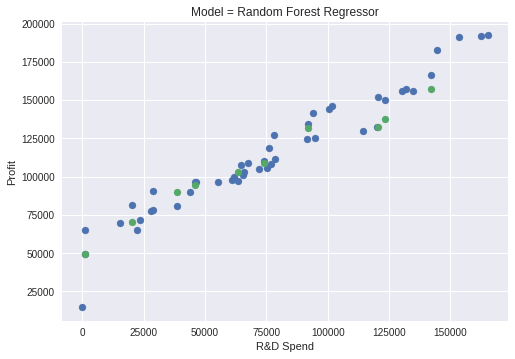

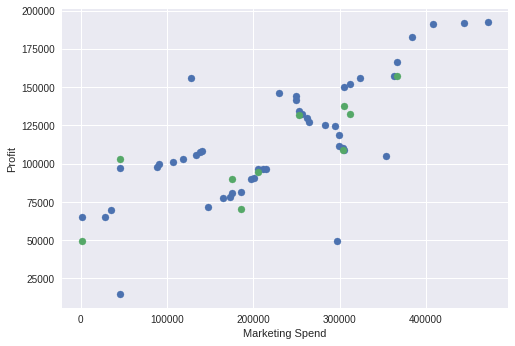

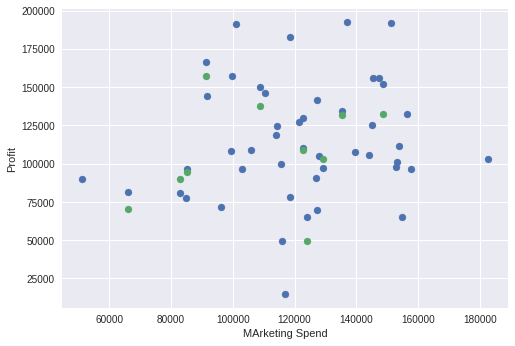

In [23]:
plotter("Random Forest Regressor")

In [24]:
from sklearn.svm import SVR
model3 = SVR(kernel='linear')
model3.fit(X_train, y_train)

SVR(kernel='linear')

In [25]:
y_pred3 = model3.predict(X_test)
s_SVR = r2_score(y_test, y_pred3), mean_squared_error(y_test, y_pred3)
s_SVR

(0.9131405283580261, 95865596.30636798)

In [26]:
newdf2["Predicted Profit"] = y_pred3
newdf = pd.concat([newdf1, newdf2])

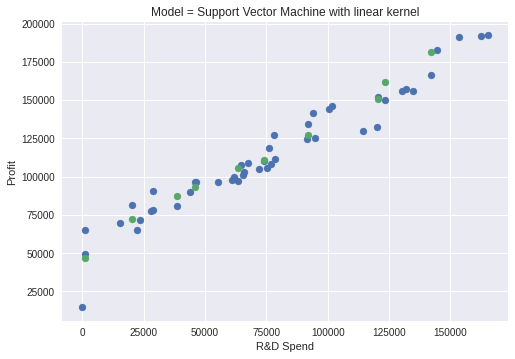

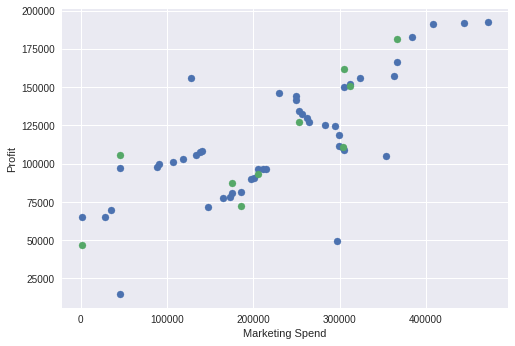

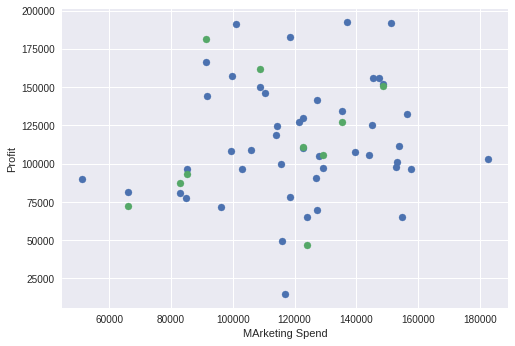

In [27]:
plotter("Support Vector Machine with linear kernel")

In [28]:
from sklearn.linear_model import LinearRegression
model4 = LinearRegression()
model4.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred4 = model4.predict(X_test)
s_LinearRegression = r2_score(y_test, y_pred4), mean_squared_error(y_test, y_pred4)
s_LinearRegression

(0.9369412208877348, 69597101.4752014)

In [30]:
newdf2["Predicted Profit"] = y_pred4
newdf = pd.concat([newdf1, newdf2])

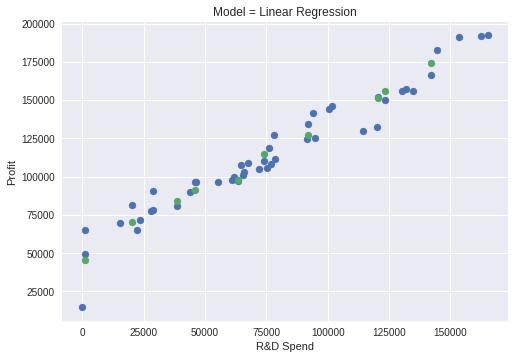

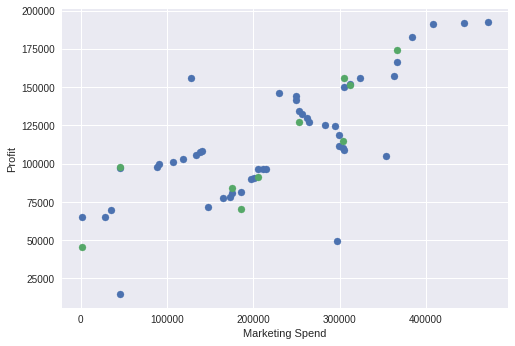

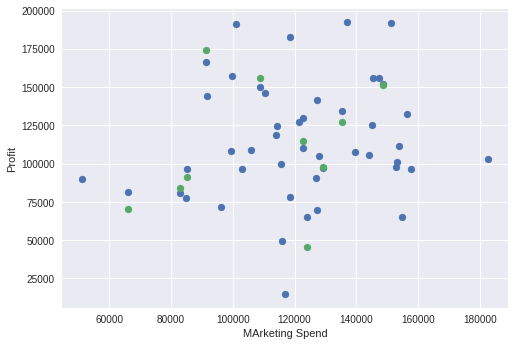

In [31]:
plotter("Linear Regression")

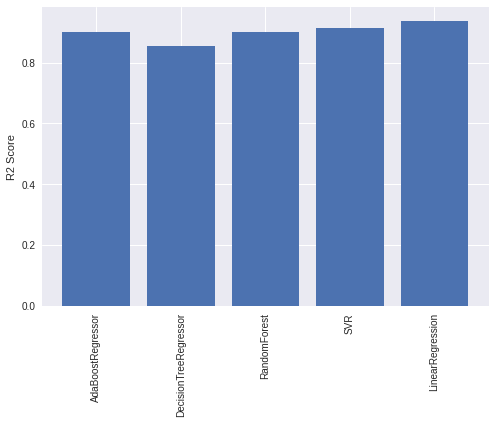

In [32]:
plt.bar(np.arange(5), [s_AdaBoostRegressor[0], s_DecisionTreeRegressor[0], s_RandomForest[0], s_SVR[0], s_LinearRegression[0]])
plt.xticks(np.arange(5), ["AdaBoostRegressor", "DecisionTreeRegressor", "RandomForest", 'SVR', "LinearRegression"])
plt.xticks(rotation = 90)
plt.ylabel('R2 Score')
plt.show()

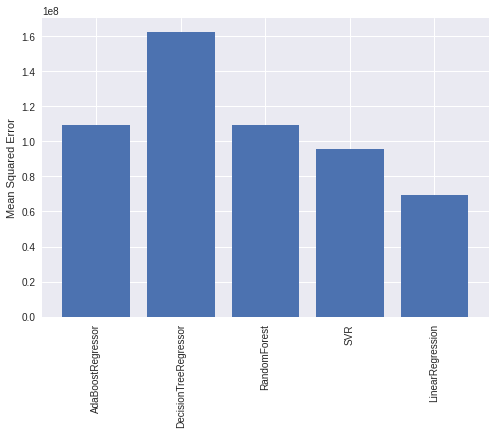

In [33]:
plt.bar(np.arange(5), [s_AdaBoostRegressor[1], s_DecisionTreeRegressor[1], s_RandomForest[1], s_SVR[1], s_LinearRegression[1]])
plt.xticks(np.arange(5), ["AdaBoostRegressor", "DecisionTreeRegressor", "RandomForest", 'SVR', "LinearRegression"])
plt.xticks(rotation = 90)
plt.ylabel('Mean Squared Error')
plt.show()

In [34]:
s_AdaBoostRegressor[0], s_DecisionTreeRegressor[0], s_RandomForest[0], s_SVR[0], s_LinearRegression[0]

(0.9011049007312759,
 0.8528732717154179,
 0.9011049007312759,
 0.9131405283580261,
 0.9369412208877348)